# Modelling 

### Final - PreProcessing

In [279]:
# Importing the libraries

# Final - preprocessing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt


# visulizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling, stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import math
import sklearn.metrics as sklm
import statsmodels.api as sm

# Model saving
import pickle

In [2]:
# reading the cleaned data
cleaned=pd.read_csv("D:/github/dataSets/dpa_project/cleanedDataForModelling.csv").drop('age',axis=1)

In [3]:
# glimpse of the data
cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,17899,2012.0,volkswagen,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black,west
1,13999,2009.0,ram,good,6 cylinders,gas,120057.0,clean,automatic,4wd,pickup,silver,west
2,34500,2017.0,ford,excellent,6 cylinders,diesel,95484.0,clean,automatic,4wd,pickup,white,west
3,14500,2007.0,gmc,excellent,6 cylinders,gas,89340.0,clean,automatic,4wd,pickup,white,west
4,12500,2013.0,ford,fair,6 cylinders,gas,226031.0,clean,automatic,4wd,pickup,white,west


### Skeweness - Making the independent variable normal distribution

In [4]:
# Applying log tranformation - for normal distribution (rememeber we find it is skewed in EDA)
cleaned["price"]=np.log1p(cleaned["price"])

### Splitting the dataset

In [5]:
# Splitting the data using sklearn for modelling
y=cleaned["price"]
x=cleaned.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Normalization

In [6]:
# Applying normalization for the atrributes to be on same scaling
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()
x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()
x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin))

x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin))

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

### Encoding

In [7]:
# For ordinal - attributes
# Labe encoding
ordinal_columns=["cylinders"]

for col in ordinal_columns:
     le = LabelEncoder()
     le.fit_transform(list(x_train[col].astype(str).values))
     x_train[col] = le.transform(list(x_train[col].astype(str).values))

for col in ordinal_columns:
    le.fit(list(x_test[col].astype(str).values))
    x_test[col] = le.transform(list(x_test[col].astype(str).values))

# for nominal attributes - one hot encoding
xx_train=pd.get_dummies(x_train)
xx_test=pd.get_dummies(x_test)

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
missing_cols=set(xx_train.columns)-set(xx_test.columns)
for val in missing_cols:
    xx_test[val]=0
    
xx_test=xx_test[xx_train.columns]

### Metrics

In [49]:
# storing the model metrics (r2, rmse) for latter anaysis and comparing the model
acc_train_r2 = []
acc_test_r2 = []
acc_train_rmse = []
acc_test_rmse = []

###  Gradient Boosting Algo - Modelling

In [15]:
# Hyper-Paramter Tuning - Gradient Boositng
def train_GB(est,max_depth,lr):
    params={'n_estimators': est, 'max_depth': max_depth,'learning_rate': lr}
    gb=ensemble.GradientBoostingRegressor(**params)
    gb_model=gb.fit(xx_train,y_train)
    y_pred=gb_model.predict(xx_test)
    ybar=np.sum(y_test)/len(y_test)
    sse = np.sum((y_test-y_pred)**2)  
    sst = np.sum((y_test - ybar)**2) 
    rsq=1-(sse/sst)
    print("{}---> NEstimators{}-MaxDepth{}-LearningRate{}".format(rsq,est,max_depth,lr))

In [10]:
# Traing the model with the best parametes from abover hyper-paramater tuning
params={'n_estimators': 500, 'max_depth': 8,'learning_rate': 0.1}
gb=ensemble.GradientBoostingRegressor(**params)
gb_model=gb.fit(xx_train,y_train)

In [50]:
# predicting the metrics r2,rmse on test data 

y_pred=gb_model.predict(xx_test)
mse = mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
rmse
print("Root Mean Squared Error Test={}".format(rmse))

acc_test_rmse.insert(0,rmse)

ybar=np.sum(y_test)/len(y_test)
sse = np.sum((y_test-y_pred)**2)  
sst = np.sum((y_test - ybar)**2) 
rsq=1-(sse/sst)
print("R-Squared Test={}".format(rsq))

acc_test_r2.insert(0,rsq)


Root Mean Squared Error Test=0.2924540751026011
R-Squared Test=0.8396300526912789


In [12]:
# feature Importance of the model
features=pd.DataFrame(gb_model.feature_importances_,index=xx_train.columns)
features["columns"]=features.index
features.index=range(0,len(features))
features.columns=["value","columns"]

print("Feature Importances")
categorical_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','state']
for val in categorical_columns:
    p=(features[features["columns"].str.startswith(val)]["value"].sum())/len(features[features["columns"].str.startswith(val)]["value"])
    print("{}>>{}".format(val,p))

for index,row in features.iterrows():
    if(row["columns"]=="odometer"):
        print("Odometer>>{}".format(row["value"]))
    if(row["columns"]=="year"):
        print("Year>>{}".format(row["value"]))

Feature Importances
manufacturer>>0.0013349999340067614
condition>>0.002012473516363473
cylinders>>0.08073408622355019
fuel>>0.016897971295484628
title_status>>0.0021680462709201885
transmission>>0.0017576965764930811
drive>>0.003859739066129869
type>>0.006429832824636217
paint_color>>0.00040010407456338826
state>>0.0028504878659479744
Year>>0.5343092258347472
Odometer>>0.0950705639878491


In [51]:
# predicting the metrics r2,rmse on train data 
y_predtr=gb_model.predict(xx_train)

mse = mean_squared_error(y_train,y_predtr)
rmse=sqrt(mse)
rmse
print("Root Mean Squared Error Train={}".format(rmse))

acc_train_rmse.insert(0,rmse)


ybar=np.sum(y_train)/len(y_train)
sse = np.sum((y_train-y_predtr)**2)  
sst = np.sum((y_train - ybar)**2) 
rsq=1-(sse/sst)
print("R-Squared={} Train".format(rsq))

acc_train_r2.insert(0,rsq)


Root Mean Squared Error Train=0.2688977552336742
R-Squared=0.8646054168264261 Train


In [284]:
# Saving the model
pickle.dump(gb_model, open('GradBReg.pkl','wb'))

###  Random Forest - Modelling

In [14]:
# training the random forest model with 20 tress and predicting the metrics r2,rmse on test data 

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(xx_train,y_train)
print('R^2 score, Coefficient of determination:',regressor.score(xx_test, y_test))
y_pred_test = regressor.predict(xx_test)
y_pred_train = regressor.predict(xx_train)


# Metrics
from sklearn import metrics
print('Mean Absolute test Error:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print('Mean Absolute train Error:', round(metrics.mean_absolute_error(y_train, y_pred_train),2))
print('------------------------------------')

print('Mean Squared test Error:', round(metrics.mean_squared_error(y_test, y_pred_test),2))
print('Mean Squared train Error:', round(metrics.mean_squared_error(y_train, y_pred_train),2))
print('------------------------------------')

print('Root Mean Squared test Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))
print('Root Mean Squared train Error:', round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),2))

print('------------------------------------')

acc_train_rmse.insert(1, round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),2))
acc_test_rmse.insert(1, round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))
acc_test_r2.insert(1,regressor.score(xx_test, y_test))
acc_train_r2.insert(1,regressor.score(xx_train, y_train))

R^2 score, Coefficient of determination: 0.8553009387424656
Mean Absolute test Error: 0.17
Mean Absolute train Error: 0.08
------------------------------------
Mean Squared test Error: 0.08
Mean Squared train Error: 0.02
------------------------------------
Root Mean Squared test Error: 0.28
Root Mean Squared train Error: 0.14
------------------------------------


In [13]:
# training the random forest model with 200 tress, we can see that there is am minute improvement 
# predicting the metrics r2,rmse on test data 

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(xx_train,y_train)
print(regressor.score(xx_test, y_test))
y_pred_test = regressor.predict(xx_test)
y_pred_train = regressor.predict(xx_train)


# Metrics
from sklearn import metrics
print('Mean Absolute test Error:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print('Mean Absolute train Error:', round(metrics.mean_absolute_error(y_train, y_pred_train),2))
print('------------------------------------')

print('Mean Squared test Error:', round(metrics.mean_squared_error(y_test, y_pred_test),2))
print('Mean Squared train Error:', round(metrics.mean_squared_error(y_train, y_pred_train),2))
print('------------------------------------')

print('Root Mean Squared test Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))
print('Root Mean Squared train Error:', round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),2))
print('------------------------------------')

0.8606586405003228
Mean Absolute test Error: 0.17
Mean Absolute train Error: 0.07
------------------------------------
Mean Squared test Error: 0.07
Mean Squared train Error: 0.02
------------------------------------
Root Mean Squared test Error: 0.27
Root Mean Squared train Error: 0.13
------------------------------------


In [283]:
# saving the model
pickle.dump(regressor, open('RandomFReg.pkl','wb'))

### Multiple Regression + Regulirization

In [15]:
# Variance Influence factor for finding the multi-collinearity
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [16]:
# Multiple Linear Regression
# predicting the metrics r2,rmse on test data and train data
lreg_fill = LinearRegression()
lreg_fill.fit(xx_train, y_train)
y_fill_pred_train = lreg_fill.predict(xx_train)
y_fill_pred_test = lreg_fill.predict(xx_test)

In [17]:
# predicting the metrics r2,rmse on test data and train data

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_fill_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_fill_pred_test))))   

Root Mean Square Error train = 0.3796182767517307
Root Mean Square Error test = 1706824.255638588


In [53]:
# inserting the caculated metrics for latter analysis
acc_train_rmse.insert(2, round(np.sqrt(metrics.mean_squared_error(y_train, y_fill_pred_train)),2))
acc_test_rmse.insert(2, round(np.sqrt(metrics.mean_squared_error(y_test, y_fill_pred_test)),2))
acc_test_r2.insert(2,lreg_fill.score(xx_test, y_test))
acc_train_r2.insert(2,lreg_fill.score(xx_train, y_train))

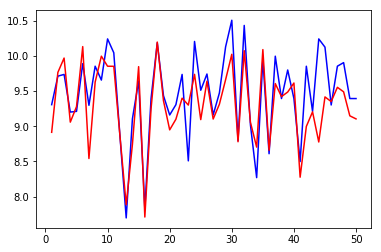

In [19]:
# Comparing the predicted train values and actual train values
c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_train[0:50],color="blue",linestyle="-")
plt.plot(c,y_fill_pred_train[0:50],color="red",linestyle="-")

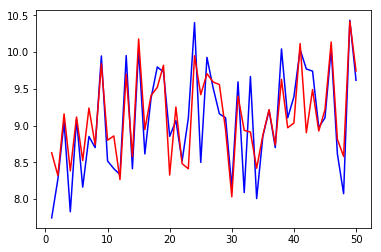

In [20]:
# Comparing the predicted test values and actual test values
c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_test[0:50],color="blue",linestyle="-")
plt.plot(c,y_fill_pred_test[0:50],color="red",linestyle="-")

In [21]:
# fitting the linear regression kdel using stats model
X_fill_train = sm.add_constant(xx_train)
lreg_fill1 = sm.OLS(y_train,xx_train).fit()
lreg_fill1.summary()

C:\Users\sukes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     9967.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:49:38   Log-Likelihood:            -1.4602e+05
No. Observations:              324232   AIC:                         2.922e+05
Df Residuals:                  324143   BIC:                         2.932e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
year                             2.0846      0.005    403.578      0.000       2.074       2.095
cylinders                        0.0895      0.001    114.100      0.000       0.088       0.091
odometer                        -1.1268      0.006   -202.530      0.000      -1.138      -1.116
manufacturer_acura               0.2130      0.014     14.721      0.000       0.185       0.241
manufacturer_alfa-romeo          0.5099      0.057      8.907      0.000       0.398       0.622
manufacturer_aston-martin        1.6882      0.262      6.437      0.000       1.174       2.202
manufacturer_audi                0.2088      0.014     14.967      0.000       0.181       0.236
manufacturer_bmw                 0.2079      0.013     15.819      0.000       0.182       0.234
manufacturer_buick               0.0343      0.014      2.467      0.014       0.007       0.062
manufacturer_cadillac            0.2570      0.014     18.758      0.000       0.230       0.284
manufacturer_chevrolet           0.1318      0.013     10.386      0.000       0.107       0.157
manufacturer_chrysler           -0.0723      0.014     -5.352      0.000      -0.099      -0.046
manufacturer_dodge              -0.0111      0.013     -0.851      0.395      -0.037       0.014
manufacturer_fiat               -0.3441      0.021    -16.775      0.000      -0.384      -0.304
manufacturer_ford                0.1114      0.013      8.798      0.000       0.087       0.136
manufacturer_gmc                 0.2383      0.013     18.396      0.000       0.213       0.264
manufacturer_harley-davidson     0.1348      0.034      3.978      0.000       0.068       0.201
manufacturer_honda               0.1218      0.013      9.456      0.000       0.097       0.147
manufacturer_hyundai            -0.0969      0.013     -7.316      0.000      -0.123      -0.071
manufacturer_infiniti            0.2383      0.015     16.390      0.000       0.210       0.267
manufacturer_jaguar              0.2781      0.019     14.492      0.000       0.240       0.316
manufacturer_jeep                0.2257      0.013     17.460      0.000       0.200       0.251
manufacturer_kia                -0.1165      0.013     -8.636      0.000      -0.143      -0.090
manufacturer_land rover         -0.0304      0.091     -0.335      0.737      -0.208       0.147
manufacturer_lexus               0.4289      0.014     31.092      0.000       0.402       0.456
manufacturer_lincoln             0.1441      0.015      9.688      0.000       0.115       0.173
manufacturer_mazda              -0.0326      0.014     -2.338      0.019      -0.060      -0.005
manufacturer_mercedes-benz       0.3094      0.013     23.264      0.000       0.283       0.335
manufacturer_mercury            -0.2179      0.017    -12.590      0.000    

### Ridge

In [22]:
# hyper-paramter tuning to find the optimum alpha
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(xx_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 1}
The best score achieved with Alpha=11 is:  0.3797468186397476


In [23]:
# training the ridge regression model with alpha = 1 - regulirization

from sklearn.linear_model import Ridge
ridge_mod=Ridge(alpha=10)
ridge_mod.fit(xx_train,y_train)
y_pred_train_ridge=ridge_mod.predict(xx_train)
y_pred_test_ridge=ridge_mod.predict(xx_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train_ridge))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test_ridge)))) 

Root Mean Square Error train = 0.3796592179248665
Root Mean Square Error test = 0.37881331195293727


In [24]:
# training the ridge regression model with alpha = 10 - regulirization

ridge_mod=Ridge(alpha=1)
ridge_mod.fit(xx_train,y_train)
y_pred_train_ridge=ridge_mod.predict(xx_train)
y_pred_test_ridge=ridge_mod.predict(xx_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train_ridge))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test_ridge)))) 

Root Mean Square Error train = 0.37962478658504784
Root Mean Square Error test = 0.3787579839921529


In [54]:
# inserting the caculated metrics for latter analysis

acc_train_rmse.insert(3, round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),2))
acc_test_rmse.insert(3, round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))
acc_test_r2.insert(3,ridge_mod.score(xx_test, y_test))
acc_train_r2.insert(3,ridge_mod.score(xx_train, y_train))

In [282]:
# saving the model
pickle.dump(ridge_mod, open('RidgeReg.pkl','wb'))

### LASSO

In [26]:
# hyper-paramter tuning to find the optimum alpha

from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(xx_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)


The best value of Alpha is:  {'alpha': 0.0001}


In [27]:
# training the lasso regression model with alpha = 0.0001 - regulirization

from sklearn.linear_model import Lasso

lasso_mod=Lasso(alpha=0.0001)
lasso_mod.fit(xx_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# prediciting the metrics
y_lasso_train=lasso_mod.predict(xx_train)
y_lasso_test=lasso_mod.predict(xx_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.37992298097850474
Root Mean Square Error test = 0.37906129567918456


In [55]:
# inserting the caculated metrics for latter analysis

acc_train_rmse.insert(4, round(np.sqrt(metrics.mean_squared_error(y_train, y_lasso_train)),2))
acc_test_rmse.insert(4, round(np.sqrt(metrics.mean_squared_error(y_test, y_lasso_test)),2))
acc_test_r2.insert(4,lasso_mod.score(xx_test, y_test))
acc_train_r2.insert(4,lasso_mod.score(xx_train, y_train))

In [281]:
# saving the model
pickle.dump(lasso_mod, open('LassoReg.pkl','wb'))

### Bagging Regressor

In [30]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
# train the bagging regressor model

bagging = BaggingRegressor()
bag_mod = bagging.fit(xx_train,y_train)

In [31]:
#Bagging Regressor to predict the final Test
bag_test = bag_mod.predict(xx_test)
bag_train = bag_mod.predict(xx_train)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, bag_test))))
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, bag_train))))

Root Mean Square Error test = 0.28366721716455967
Root Mean Square Error train = 0.14758495746998565


In [56]:
acc_train_rmse.insert(5, round(np.sqrt(metrics.mean_squared_error(y_train, bag_train)),2))
acc_test_rmse.insert(5, round(np.sqrt(metrics.mean_squared_error(y_test, bag_test)),2))
acc_test_r2.insert(5,bag_mod.score(xx_test, y_test))
acc_train_r2.insert(5,bag_mod.score(xx_train, y_train))

In [280]:
# saving the model
pickle.dump(bag_mod, open('BagReg.pkl','wb'))

### AVERAGING THE REGRESSORS

In [33]:
# Averaging the regressor models/ bLendig the best models

#GradientBoosting Regressor to predict the final Test
gb_test = gb_model.predict(xx_test)
gb_train = gb_model.predict(xx_train)
#final1=np.expm1(gb_test)

# RandomForest Regressor to predict the final Test
rf_test = regressor.predict(xx_test)
rf_train = regressor.predict(xx_train)
#final2=np.expm1(rf_test)

#LassoRegressor to predict the final Test
lasso_train = lasso_mod.predict(xx_train)
lasso_test = lasso_mod.predict(xx_test)
#final3=np.expm1(lasso_test)

#Bagging Regressor to predict the final Test
bag_test = bag_mod.predict(xx_test)
bag_train = bag_mod.predict(xx_train)

In [73]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final_test=(0.3*rf_test+0.3*gb_test+0.4*bag_test )
final_train = (0.3*rf_train+0.3*gb_train +0.4*bag_train)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))
print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, final_train))))

Root Mean Square Error test = 0.2693997975401083
Root Mean Square Error train = 0.16570418494985867


In [57]:
acc_train_rmse.insert(6, round(np.sqrt(metrics.mean_squared_error(y_train, final_train)),2))
acc_test_rmse.insert(6, round(np.sqrt(metrics.mean_squared_error(y_test, final_test)),2))

In [58]:
acc_train_r2.insert(6,0.3*acc_train_r2[1]+0.3*acc_train_r2[0]+0.4*acc_train_r2[5])
acc_test_r2.insert(6,0.3*acc_test_r2[1]+0.3*acc_test_r2[0]+0.4*acc_test_r2[5])

### Blending Models 

In [142]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, ElasticNetCV
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold, cross_val_score

### Cross-Validation

In [148]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=x):
    rmse = np.sqrt(-cross_val_score(model, xx_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

### Setting the model(lightGBM, XGboost, Stacking REg ) Paramters

In [146]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, ridge, regressor),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


### Light GBM

In [149]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.3297 (0.0026)


In [152]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(xx_train, y_train)


lightgbm


### XgBoost

In [150]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[03:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[03:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[04:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

In [153]:
print('xgboost')
xgb_model_full_data = xgboost.fit(xx_train, y_train)

xgboost
[12:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


### Stacking Reg

In [151]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(xx_trainainain), np.array(y_train))

stack_gen
[09:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[09:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[11:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression

In [275]:
pickle.dump(stack_gen_model, open('StackReg.pkl','wb'))

### Blending - 2

In [269]:
def blended_predictions(X):
    return ((0.25 * bag_mod.predict(X)) + \
            (0.1 * gb_model.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.20 * regressor.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

blended_score = rmsle(y_test, blended_predictions(xx_test))
rmse_test_scores['blended-2'] = blended_score
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.27035102492034524


### Blending - 3

In [270]:
def blended_predictions(X):
    return ((0.25 * bag_mod.predict(X)) + \
            (0.25 * gb_model.predict(X)) + \
            #(0.1 * xgb_model_full_data.predict(X)) + \
            #(0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * regressor.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))
blended_score = rmsle(y_test, blended_predictions(xx_test))
rmse_test_scores['blended-3'] = blended_score

print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.26774230694509343


# Models Evaluation

In [201]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest', 
              'Multiple Regression','Ridge',
                'Lasso', 'BaggingRegressor', 
              'Blended-1'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [202]:
pd.options.display.float_format = '{:,.2f}'.format

### Investing the overfitting and underfitting -

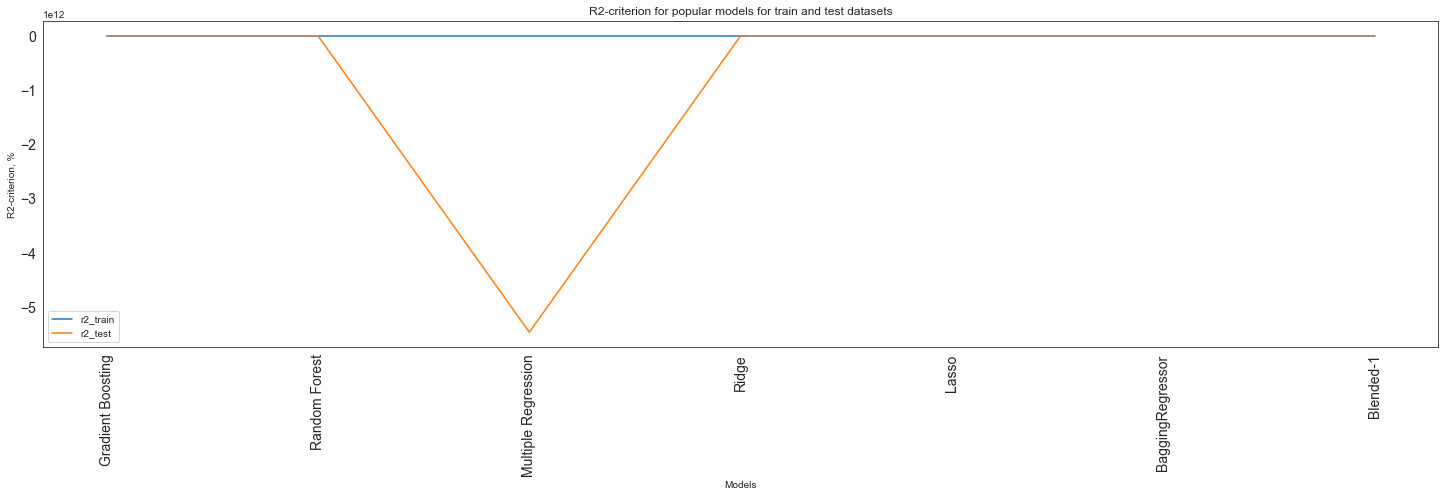

In [272]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

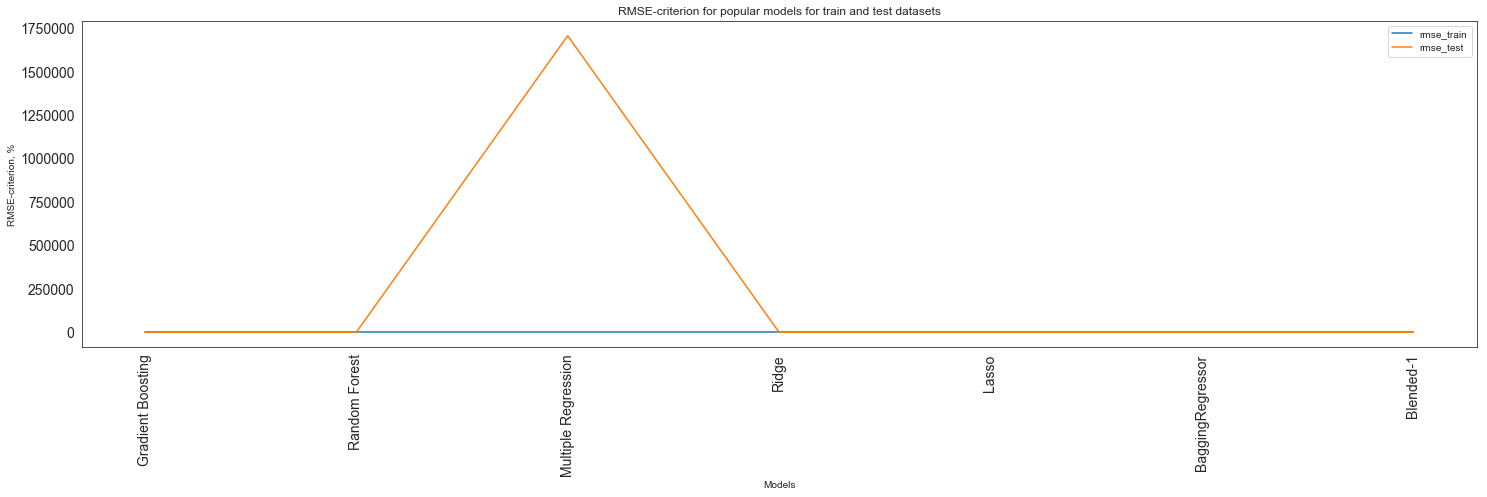

In [273]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE-criterion for popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [268]:
# Converting the data frames scores to dictionary
rmse_test_scores = models.loc[models.Model != 'Multiple Regression',['Model','rmse_test']].set_index('Model')['rmse_test'].to_dict()

In [255]:
# Converting the data frames scores to dictionary
rmse_train_scores = models.loc[models.Model != 'Multiple Regression',['Model','rmse_train']].set_index('Model')['rmse_train'].to_dict()

r2_train_scores = models[['Model','r2_train']].set_index('Model')['r2_train'].to_dict()
r2_test_scores = models[['Model','r2_test']].set_index('Model')['r2_test'].to_dict()

### RMSE - Test 

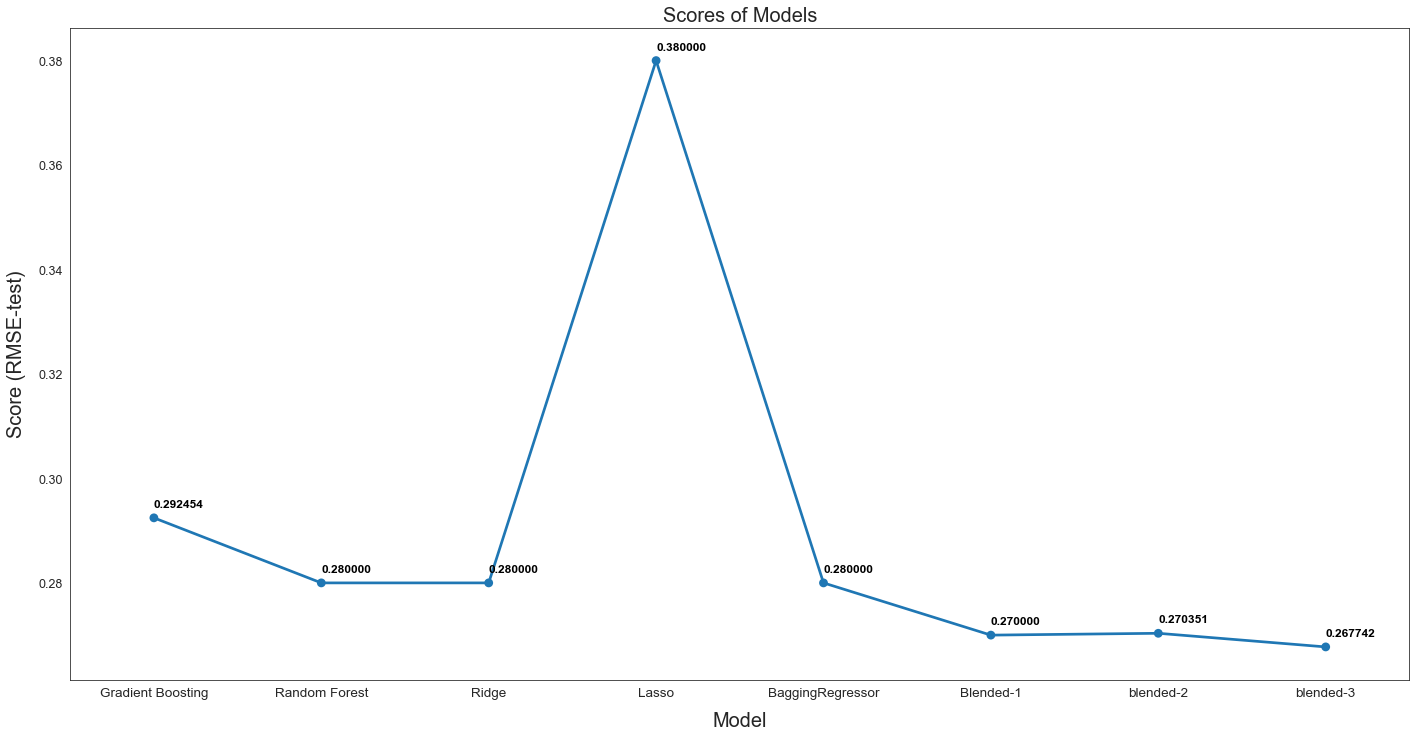

In [264]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(rmse_test_scores.keys(),rmse_test_scores.values()):
    rmse_test_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(rmse_test_scores.keys()), y=[score for score, _ in rmse_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE-test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### RMSE - Train

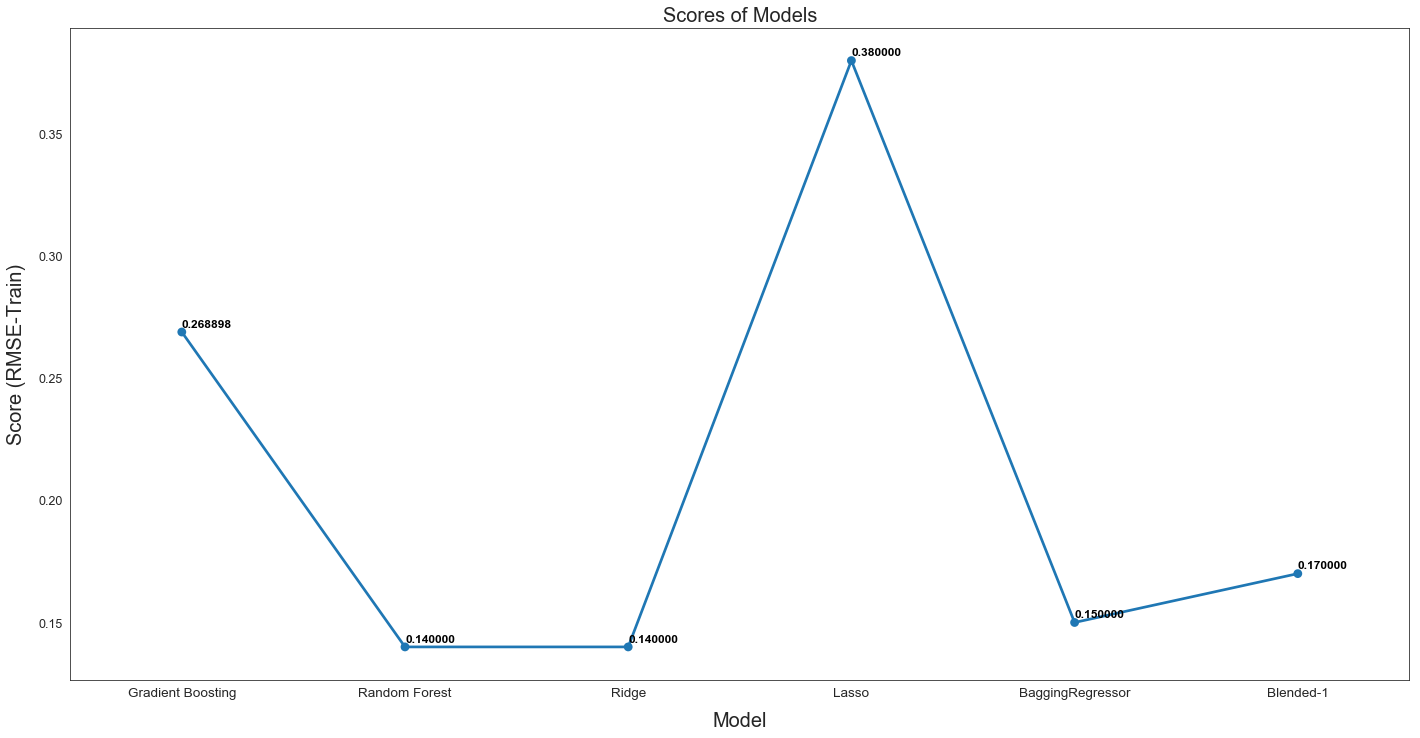

In [258]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(rmse_train_scores.keys(),rmse_train_scores.values()):
    rmse_train_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(rmse_train_scores.keys()), y=[score for score, _ in rmse_train_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_train_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE-Train)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### R2 - Train 

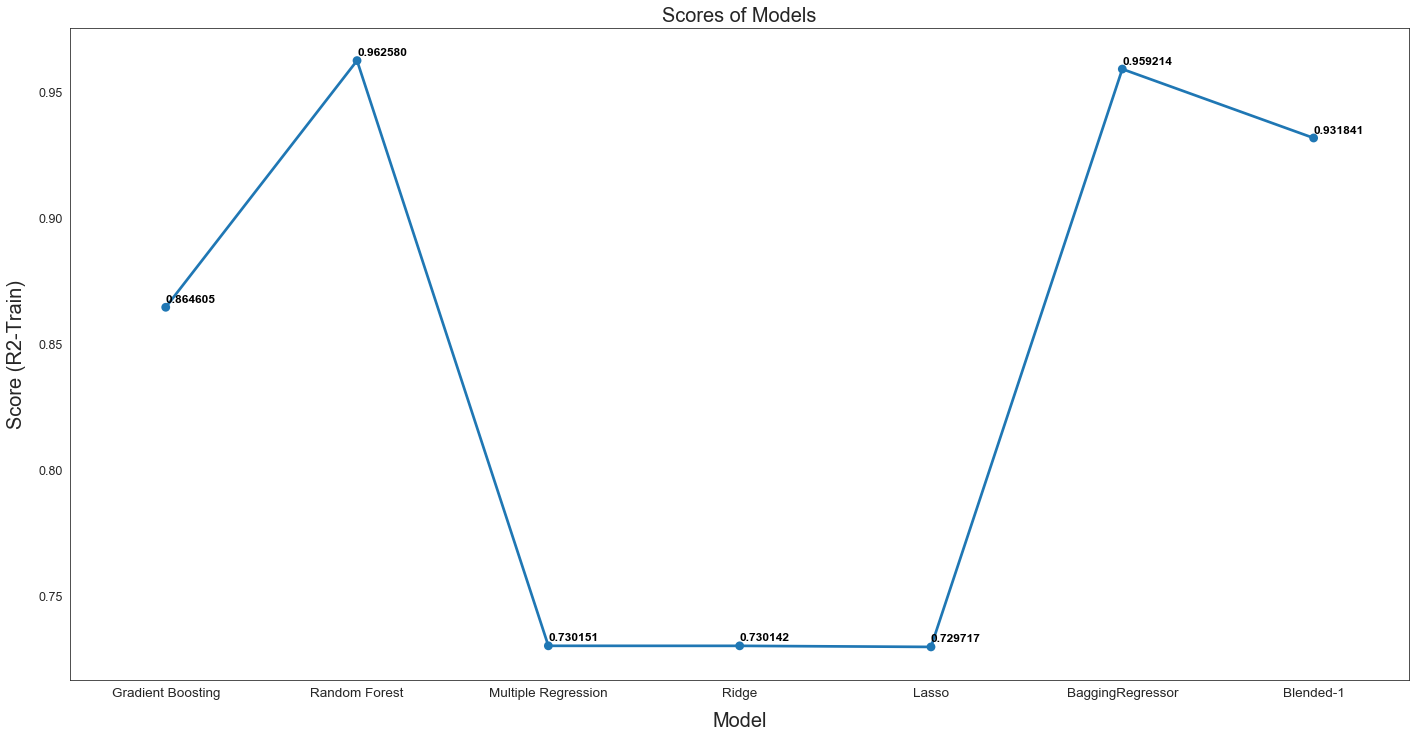

In [257]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(r2_train_scores.keys(),r2_train_scores.values()):
    r2_train_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(r2_train_scores.keys()), y=[score for score, _ in r2_train_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(r2_train_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (R2-Train)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### R2 - test scores

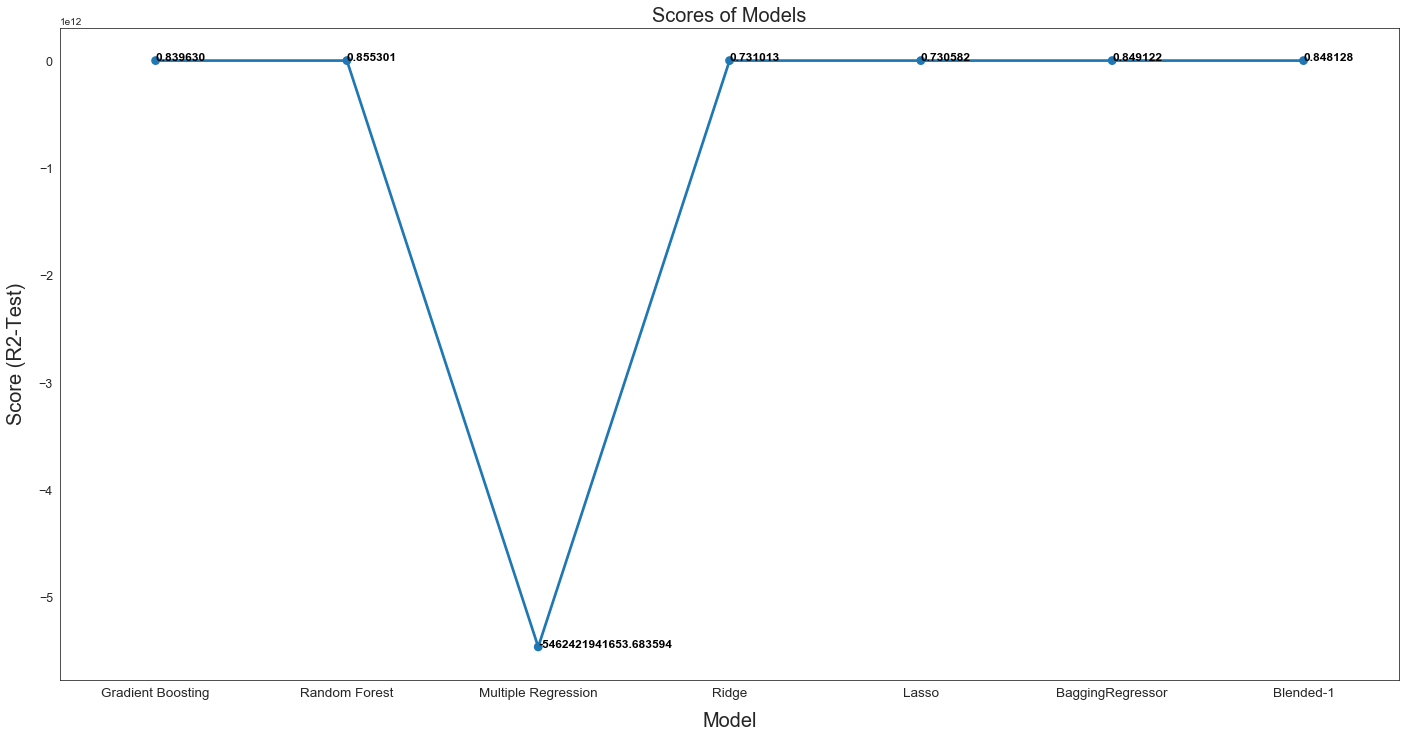

In [256]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(r2_test_scores.keys(),r2_test_scores.values()):
    r2_test_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(r2_test_scores.keys()), y=[score for score, _ in r2_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(r2_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (R2-Test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

# Result

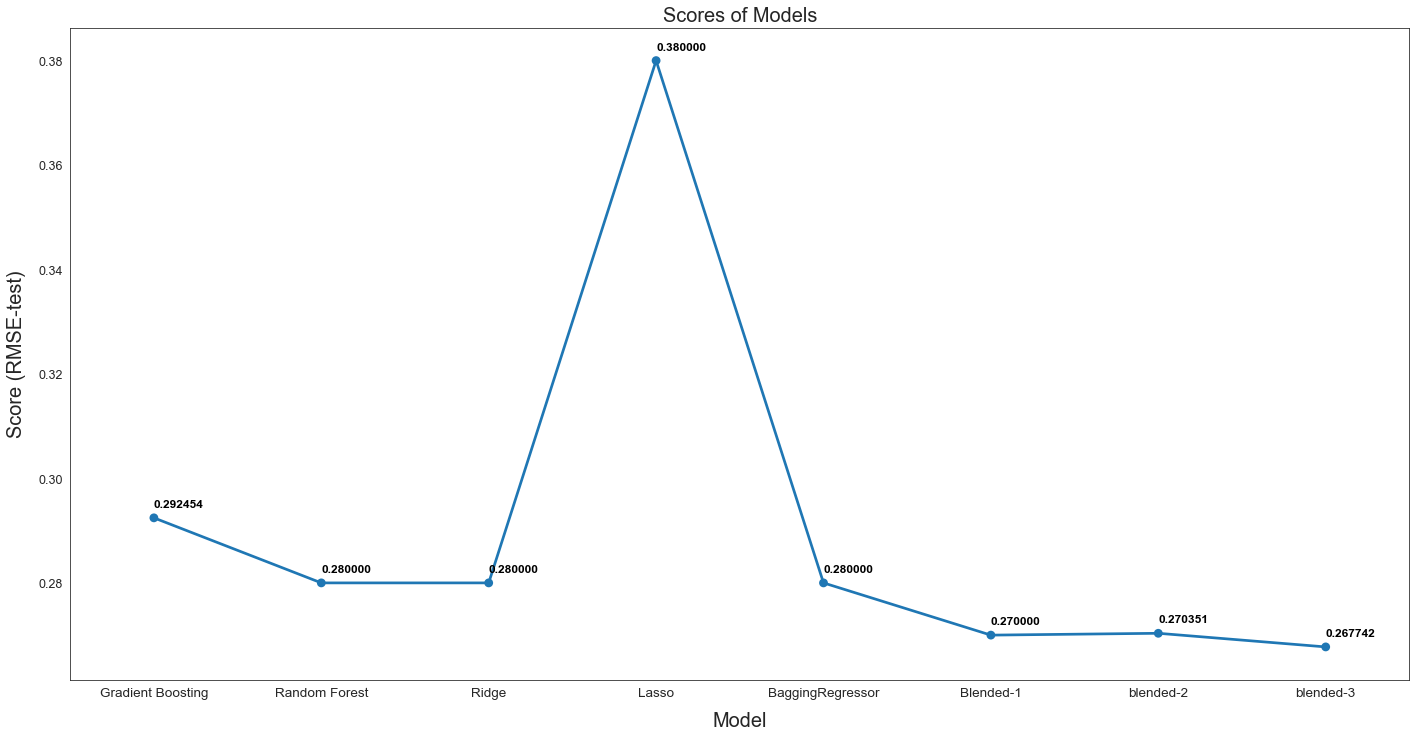

In [271]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(rmse_test_scores.keys(),rmse_test_scores.values()):
    rmse_test_scores[a] = (b,0)

# Plot the predictions for each model - rmse test scores
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(rmse_test_scores.keys()), y=[score for score, _ in rmse_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE-test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### We can look from the metrics,scores that the top performance models are in ranking wise:
    1) Blended - 3
    2) Blended - 2,1
    3) Bagging Reggresor, Gradient Boosting
    4) Random Forest